In [142]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


# Basic 5 Steps

1. Load the data
2. Instantiate the model
3. Train/fit the model
4. Evaluate the model
5. Change hyperparameters to improve performance

In linear regression we won't use any activation function as we want to predict the value

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [144]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-04 15:57:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.11’

moore.csv.11        100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-04 15:57:54 (46.9 MB/s) - ‘moore.csv.11’ saved [2302/2302]



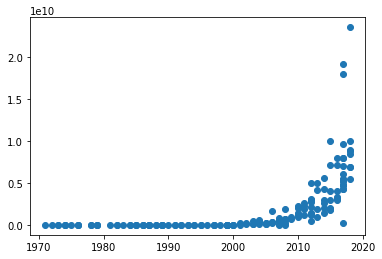

In [145]:
data = pd.read_csv('moore.csv', error_bad_lines=False,header=None).values
X = data[:,0].reshape(-1,1)
y = data[:,1]
plt.scatter(X,y)

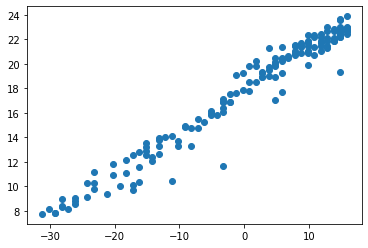

In [146]:
# taking log of y and centering the data 

X = X - X.mean()
y = np.log(y)
plt.scatter(X,y)


## Exponential Growth

C = A<sub>0</sub>r<sup>t</sup>

C = output variable/count

A<sub>0</sub> = Initial Value

t = time

r = rate of growth


By using log function we can make exponential function linear

log C = t*log r + log A

In [147]:
# building model
# loss = mean squared error
# optimizer = stochastic gradient descent

model = tf.keras.Sequential([tf.keras.layers.Input(shape=(1,)),tf.keras.layers.Dense(1)])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0,9),loss='mse')
model.summary()

# Learning Rate Scheduling : Modify learning rate at each epoch
def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0025
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X,y,epochs=200,callbacks=[scheduler])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 459.8363 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 306.2589 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 304.1772 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 299.3808 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 298.2058 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 277.6697 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 278.0451 - lr: 0.0010
Ep

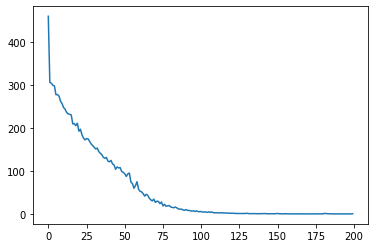

In [148]:
plt.plot(r.history['loss'],label='loss')

In [149]:
print(model.layers[0].get_weights())

[array([[0.3693551]], dtype=float32), array([17.67005], dtype=float32)]


In [150]:
w = model.layers[0].get_weights()[0][0,0]
b = model.layers[0].get_weights()[1][0]
w,b 

(0.3693551, 17.67005)

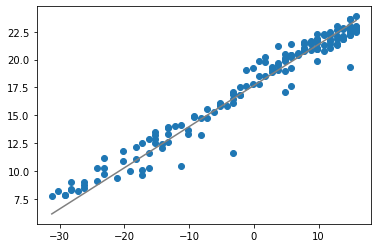

In [151]:
plt.scatter(X,y)
plt.plot(X,w*X+b,'grey')